<a href="https://colab.research.google.com/github/konstantinos-al/ml_project_quebec/blob/main/Pre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
pip install xmltodict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os
import glob
import xmltodict
from tensorflow.keras.utils import to_categorical
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

#$gbhmgvbhjg

xmls_dir = os.path.join("/content/drive/MyDrive/Untitled_folder/anot")

imgs_dir = r"/content/drive/MyDrive/Untitled_folder/ima"

heads = os.makedirs('heads', exist_ok=True)

In [ ]:
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

In [ ]:
imgs_labels = []

for dir_path in glob.glob(xmls_dir):
    for xml_path in glob.glob(os.path.join(dir_path, '*.xml')):
        with open (xml_path, 'rb') as my_xml:
            xmld = xmltodict.parse(my_xml)
            tags = xmld['annotation']

            image = cv2.cvtColor(cv2.imread(os.path.join(imgs_dir, tags['filename']), 1), cv2.COLOR_BGR2RGB)
            mask = np.zeros(image.shape, dtype = 'int32')

            if 'object' in tags:

                if isinstance(tags['object'], list):
                    for i in tags['object']:
                        xmin = int(i['bndbox']['xmin'])
                        ymin = int(i['bndbox']['ymin'])
                        xmax = int(i['bndbox']['xmax'])
                        ymax = int(i['bndbox']['ymax'])
                        if i['name'] == 'With Helmet':
                            mask = cv2.rectangle(mask, (xmin,ymin), (xmax,ymax), (0,255,0), -1)
                            result = cv2.addWeighted(image, 1, mask, 0.9, 0.7, dtype = cv2.CV_8UC3)
                            imgs_labels.append([0, image[ymin:ymax, xmin:xmax]])
                            #visualize(image=image, result = result, head = image[ymin:ymax, xmin:xmax])
                           
                        else:
                            cv2.rectangle(mask, (xmin,ymin), (xmax,ymax), (255,0,0), -1)
                            result = cv2.addWeighted(image, 1, mask, 0.9, 0.7, dtype = cv2.CV_8UC3)
                            imgs_labels.append([1, image[ymin:ymax, xmin:xmax]])
                          
                            #plt.imsave(os.path.join('results', tags['filename']), result)
                    #visualize(image=image, result = result, head = image[ymin:ymax, xmin:xmax])
                if isinstance(tags['object'], dict):
                    xmin = int(tags['object']['bndbox']['xmin'])
                    ymin = int(tags['object']['bndbox']['ymin'])
                    xmax = int(tags['object']['bndbox']['xmax'])
                    ymax = int(tags['object']['bndbox']['ymax'])
                    if tags['object']['name'] == 'With Helmet':
                        cv2.rectangle(mask, (xmin,ymin), (xmax,ymax), (0,255,0), -1)
                        result = cv2.addWeighted(image, 1, mask, 0.9, 0.7, dtype = cv2.CV_8UC3)
                        imgs_labels.append([0, image[ymin:ymax, xmin:xmax]])
                        #visualize(image=image, result = result, head = image[ymin:ymax, xmin:xmax])
                    else:
                        cv2.rectangle(mask, (xmin,ymin), (xmax,ymax), (255,0,0), -1)
                        result = cv2.addWeighted(image, 1, mask, 0.9, 0.7, dtype = cv2.CV_8UC3)
                        imgs_labels.append([1, image[ymin:ymax, xmin:xmax]])
                    # plt.imsave(os.path.join('results', tags['filename']), result)
                    #visualize(image=image, result = result, head = image[ymin:ymax, xmin:xmax])
            else:
                pass



In [ ]:
def checking_for_zero_shapes(list):
    for i, label_image in enumerate(list):
        image = np.array(label_image[1]).astype(np.int32)
        if image.shape[0]==0 or image.shape[1]==0:
            list.pop(i)

    return list

In [ ]:
imgs_labels = checking_for_zero_shapes(imgs_labels)
#imgs_labels.pop(1342) #H prohgoumenh sunarthsh de mporei na bgalei authn thn eikona, de kserw giati
imgs_labels = np.array(imgs_labels, dtype='object').reshape(-1,2,1)


#imgs_labels = np.array(imgs_labels).reshape(-1,2,1)
labels = imgs_labels[:,0].reshape(-1,1).astype(np.int32)
data = imgs_labels[:,1].flatten()
imgs = data/255
imgs = np.array(imgs)
#print(imgs)

In [ ]:
# labels = imgs_labels[:,0].reshape(-1,1).astype(np.int32)
# images = imgs_labels[:,1].flatten() # lista me to rgb kefalia 

# lb = LabelBinarizer()
# labels = lb.fit_transform(labels)
# labels = to_categorical(labels)


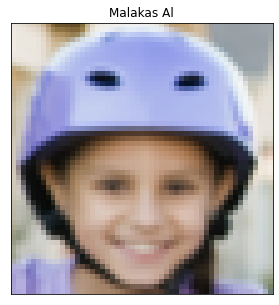

In [ ]:
visualize(MALAKAS_AL = imgs[0])

In [ ]:
with open('imgs_labels.csv', 'w') as file:
    for i, image_label in enumerate(zip(images, labels)):
        plt.imsave(os.path.join('heads', str(i)+'.png'), image_label[0])
        file.write('Label: {0} | Image: {1}.png\n'.format(image_label[1],i))
       
    file.close()

In [ ]:
shapes = []
for image in imgs:
    shapes.append([image.shape[0], image.shape[1]])

shapes = np.array(shapes)

xmin, ymin = shapes.min(axis=0)
xmax, ymax = shapes.max(axis=0)

In [ ]:
images = np.array(imgs)
print(images.shape)


trainX, testX, trainY, testY = train_test_split(images, labels, test_size=0.20, stratify=labels, random_state=42)
print(trainX.shape, testX.shape, trainY.shape, testY.shape)
print(trainX.dtype, testX.dtype, trainY.dtype, testY.dtype)

(16,)
(12,) (4,) (12, 1) (4, 1)
object object int32 int32


In [ ]:
for i in trainX:
    print(a.shape)

(73, 67, 3)
(37, 25, 3)
(55, 53, 3)
(20, 17, 3)
(21, 12, 3)
(55, 45, 3)
(88, 71, 3)
(89, 81, 3)
(31, 22, 3)
(41, 30, 3)
(50, 58, 3)
(69, 55, 3)


In [ ]:
from PIL import Image
import os, sys

ls = []

image = r"/content/drive/MyDrive/Image"
for imagename in os.listdir(image):
    
    a = Image.open(image + '/' + imagename)
    a = a.resize((200,200),Image.ANTIALIAS)
    a.save(fp = r"/content/drive/MyDrive/resize/" + imagename)


In [ ]:
pip install keras-utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

from numpy import expand_dims
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator # load the image
import xml.etree.ElementTree as ET
import cv2
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
import glob
from skimage import io
import os
from scipy.signal import convolve2d
from PIL import Image  
import PIL 
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import urllib
import xml.etree.ElementTree as ET # copy of xml
import cv2
import os

In [ ]:
def convert(img):
    # convert to numpy array
    data = img_to_array(img)
    # expand dimension to one sample
    samples = expand_dims(data, 0)
    return samples

In [ ]:
def picture_zoom(image,imagename):
   # create image data augmentation generator
    datagen_zoom= ImageDataGenerator(zoom_range=[0.8,1.5])

    # prepare iterator
    it_zoom = datagen_zoom.flow(image, batch_size=1)

    # generate batch of images
    batch_zoom = it_zoom.next()
    
    # convert to unsigned integers for viewing
    image_zoom = batch_zoom[0].astype('uint64')
    
    # plot raw pixel 
    img_zoom=plt.imshow(image_zoom, interpolation ='None', filternorm=True) #spline36, antialiased

    #save new picture
    img_zoom.figure.savefig(r"/content/drive/MyDrive/Image//Zoom"+imagename, bbox_inches='tight',transparent=True, pad_inches=0)
    
# def file_zoom(file,filename):
    
#     # create of Zoom xml file
#      file.write("C://Users//Eftixia//Desktop//dataset//Final Helmet datasets//Helmet Kaggle//annotations//Zoom"+filename+".xml")

In [ ]:
def load_images_from_folder(folder_image):
    for imagename in os.listdir(folder_image):
        
         #read the image       
        image = cv2.imread(os.path.join(folder_image,imagename))
        image_true_color = cv2.cvtColor(image, cv2.COLOR_RGBA2BGRA)
        
        img= convert(image_true_color)
        
        #call each seperate function
        picture_zoom(img,imagename)
        #picture_brightness(img,imagename)
        #picture_rotation(img,imagename)
           
        #Destroyed all window we created earlier.
        cv2.destroyAllWindows()
        
# def load_files_from_folder(folder_file):
#     for filename in os.listdir(folder_file):
        
#         #read the file
#         file = ET.parse(os.path.join(folder_file,filename))

#          #call each seperate function
#         file_zoom(file,filename)    
#         file_brightness(file,filename)
#         file_rotation(file,filename)

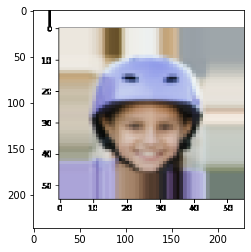

In [ ]:
folder_image= r"/content/drive/MyDrive/Image"
#folder_file=r"C://Users//Eftixia//Desktop//dataset//Final Helmet datasets//Helmet Kaggle//annotations"
 
load_images_from_folder(folder_image)
#load_files_from_folder(folder_file)